## Model Comparison

In [1]:
%pip install pymc pytensor


---


### The Toy-Model

In [8]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

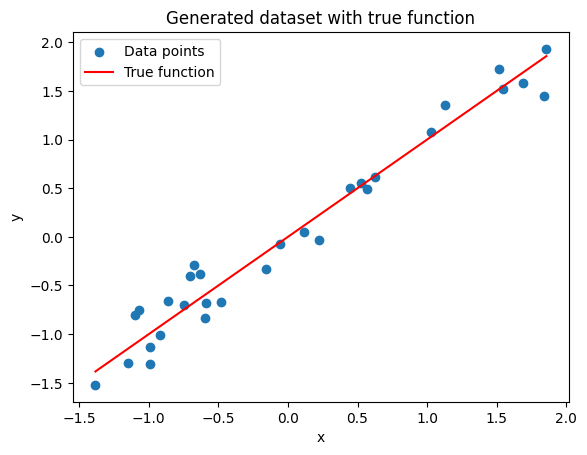

-1.4802973661668754e-17
[-0.73679458  0.60118835]


In [283]:
# Generate dataset
np.random.seed(5)  # For reproducibility
x = np.random.uniform(-2.5, 2.5, 30)  # 30 random points between -5 and 5

y = x + np.random.normal(0, 0.4, 30)  # Adding some Gaussian noise

y =(y-np.mean(y))/np.std(y)
x =(x-np.mean(x))/np.std(x)

# Plot the generated dataset
plt.scatter(x, y, label='Data points')
plt.plot(np.sort(x), np.sort(x), label='True function', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated dataset with true function')
plt.show()


print(np.mean(y))
print(np.percentile(y,[25,75]))

In [284]:
### LINEAR MODEL

with pm.Model() as model_l:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear model
    y_est = alpha + beta * x

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal('y_obs', mu=y_est, sigma=2, observed=y)

    # Inference
    idata_l = pm.sample(2000)
    trace_l = pm.sample(return_inferencedata=False)

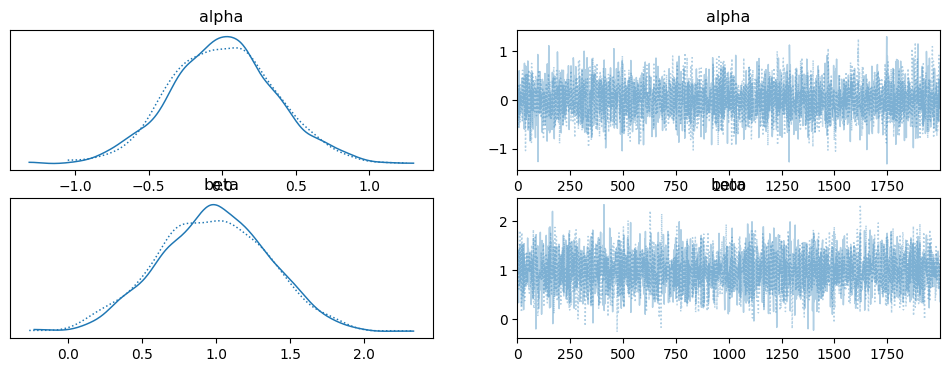

In [285]:
az.plot_trace(idata_l)
plt.show()

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'gamma'}>,
        <Axes: title={'center': 'gamma'}>]], dtype=object)

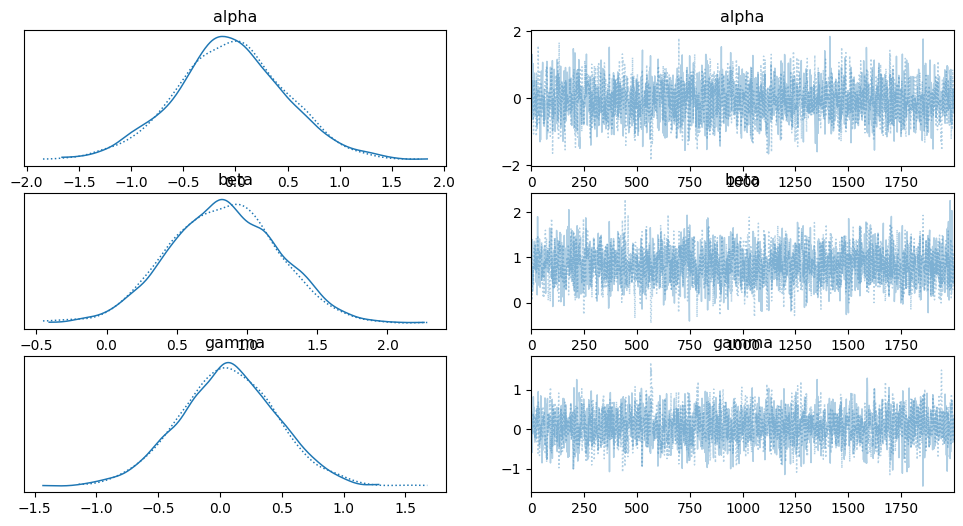

In [286]:
### POLYNOMIAL (ORDER 2) MODEL

with pm.Model() as model_p2:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    gamma = pm.Normal('gamma', mu=0, sigma=1)

    # Quadratic model
    y_est = alpha + beta * x + gamma * x**2

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal('y_obs', mu=y_est, sigma=2, observed=y)

    # Inference
    idata_p2 = pm.sample(2000)

az.plot_trace(idata_p2)
#plt.show()


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

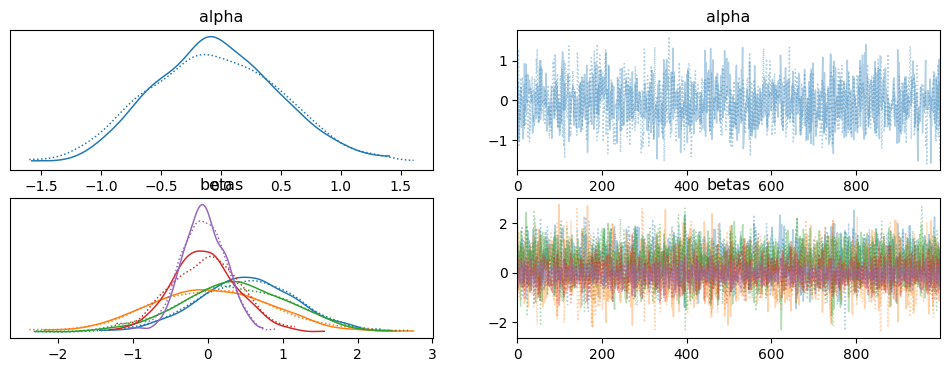

In [287]:
### POLYNOMIAL (ORDER 5) MODEL

with pm.Model() as model_p5:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    betas = pm.Normal('betas', mu=0, sigma=1, shape = 5)

    # Quadratic model
    y_est = alpha + betas[0] * x + betas[1] * x**2 + betas[2] * x**3 + betas[3] * x**4 + betas[4] * x**5

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal('y_obs', mu=y_est, sigma=2, observed=y)

    # Inference
    idata_p5 = pm.sample(1000)

az.plot_trace(idata_p5)
#plt.show()

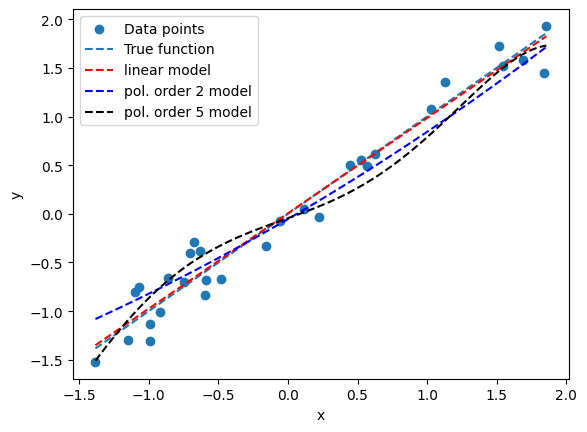

In [292]:
### Compare models


plt.scatter(x, y, label='Data points')
plt.plot(np.sort(x), np.sort(x), label='True function', color='C0', linestyle='--')

x_new = np.linspace(np.min(x),np.max(x),100)

#linear
alpha_l_post = idata_l.posterior['alpha'].mean(axis=0).mean(axis=0).values
beta_l_post = idata_l.posterior['beta'].mean(axis=0).mean(axis=0).values
yl_post = alpha_l_post + beta_l_post * x_new
plt.plot(x_new, yl_post, 'r', label='linear model', linestyle='--')

#pol 2
alpha_p2_post = idata_p2.posterior['alpha'].mean(axis=0).mean(axis=0).values
beta_p2_post = idata_p2.posterior['beta'].mean(axis=0).mean(axis=0).values
gamma_p2_post = idata_p2.posterior['gamma'].mean(axis=0).mean(axis=0).values
yp2_post = alpha_p2_post + beta_p2_post * x_new + gamma_p2_post * x_new**2
plt.plot(x_new, yp2_post, 'b', label='pol. order 2 model', linestyle='--')

#pol 5
alpha_p5_post = idata_p5.posterior['alpha'].mean(axis=0).mean(axis=0).values
beta1_p5_post = idata_p5.posterior['betas'].mean(axis=0)[:,0].mean(axis=0).values
beta2_p5_post = idata_p5.posterior['betas'].mean(axis=0)[:,1].mean(axis=0).values
beta3_p5_post = idata_p5.posterior['betas'].mean(axis=0)[:,2].mean(axis=0).values
beta4_p5_post = idata_p5.posterior['betas'].mean(axis=0)[:,3].mean(axis=0).values
beta5_p5_post = idata_p5.posterior['betas'].mean(axis=0)[:,4].mean(axis=0).values
yp5_post = alpha_p5_post + beta1_p5_post * x_new + beta2_p5_post * x_new**2 +  beta3_p5_post * x_new**3 \
+ beta4_p5_post * x_new**4 + beta5_p5_post * x_new**5

plt.plot(x_new, yp5_post, 'k', label='pol. order 5 model', linestyle='--')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()


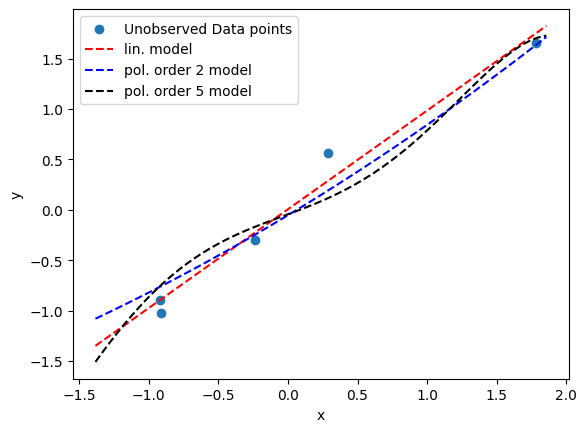

In [301]:
### new data points

unobserved = 5

x_unobs = np.random.uniform(-2.5, 2.5, unobserved)  # 30 random points between -5 and 5

y_unobs = x_unobs + np.random.normal(0, 0.4, unobserved)  # Adding some Gaussian noise

y_unobs =(y_unobs-np.mean(y_unobs))/np.std(y_unobs)
x_unobs =(x_unobs-np.mean(x_unobs))/np.std(x_unobs)

plt.scatter(x_unobs, y_unobs, label='Unobserved Data points')

plt.plot(x_new, yl_post, 'r', label='lin. model', linestyle='--')
plt.plot(x_new, yp2_post, 'b', label='pol. order 2 model', linestyle='--')
plt.plot(x_new, yp5_post, 'k', label='pol. order 5 model', linestyle='--')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Using Posterior Predictive Checks

In [242]:
y_l = pm.sample_posterior_predictive(idata_l,model=model_l)

In [243]:
y_p2 = pm.sample_posterior_predictive(idata_p2,model=model_p2)

In [244]:
y_p5 = pm.sample_posterior_predictive(idata_p5,model=model_p5)

In [253]:
y_l_obs = y_l.posterior_predictive['y_obs']
y_p2_obs = y_p2.posterior_predictive['y_obs']
y_p5_obs = y_p5.posterior_predictive['y_obs']

In [254]:
import xarray as xr
y_l_concatenated = xr.concat([y_l_obs.sel(chain=0), y_l_obs.sel(chain=1)], dim='draw')
y_p2_concatenated = xr.concat([y_p2_obs.sel(chain=0), y_p2_obs.sel(chain=1)], dim='draw')
y_p5_concatenated = xr.concat([y_p5_obs.sel(chain=0), y_p5_obs.sel(chain=1)], dim='draw')


([], [])

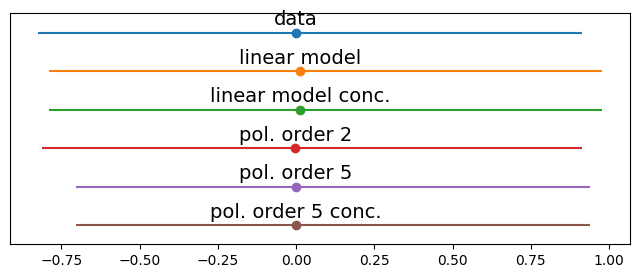

In [247]:
plt.figure(figsize=(8,3))

y_o   = y
y_lo  = y_l.posterior_predictive['y_obs'].mean(axis=0).mean(axis=0).values
y_lo2 = y_l_concatenated.mean(axis=0).values #same thing as above...
y_p2o = y_p2.posterior_predictive['y_obs'].mean(axis=0).mean(axis=0).values
y_p5o = y_p5.posterior_predictive['y_obs'].mean(axis=0).mean(axis=0).values
y_p5o2 = y_p5_concatenated.mean(axis=0).values #same thing as above...


data = [y_o, y_lo, y_lo, y_p2o, y_p5o, y_p5o2]
labels = ['data', 'linear model', 'linear model conc.', 'pol. order 2', 'pol. order 5', 'pol. order 5 conc.']

for i, d in enumerate(data):
  mean = d.mean()
  err = np.percentile(d, [25,75])
  plt.errorbar(mean,-i,xerr=[[-err[0]],[err[1]]], fmt='o')
  plt.text(mean,-i+0.2, labels[i], ha='center', fontsize=14)

plt.ylim([-i-0.5,0.5])
plt.yticks([])

some little difference, worth exploring...

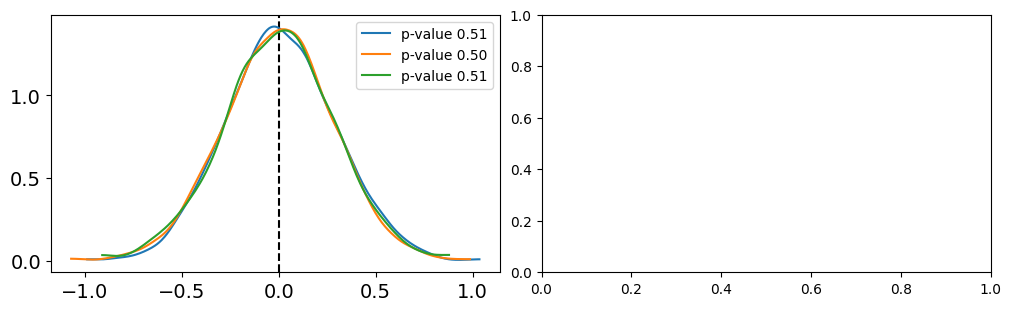

In [267]:
# to be completed... this code snippet can be easily extended to include other metrics, such as IQR (Q3-Q1)

fig, ax = plt.subplots(1,2,figsize=(10,3),constrained_layout=True)


labels = ['linear', 'poly2', 'poly5']

for idx, func in enumerate([np.mean]):

  T_obs = func(y)
  ax[idx].axvline(T_obs, 0, 1, color='k', ls='--')

  for label, d_sim, c in zip(labels,[y_l_concatenated.values, y_p2_concatenated.values, y_p5_concatenated.values],['C0','C1','C2']):
    T_sim = func(d_sim, 1)

    p_value = np.mean(T_sim >= T_obs)
    az.plot_kde(T_sim, plot_kwargs={'color':c}, label=f'p-value {p_value:.2f}', ax=ax[idx])


if data and simulation agree, we should expect a p-value around 0.5

### Using Information Criteria

In [275]:
with model_l:
    pm.compute_log_likelihood(idata_l)

In [276]:
with model_p2:
    pm.compute_log_likelihood(idata_p2)

In [282]:
df_compare = az.compare({"model_l": idata_l, "model_p2": idata_p2}, ic='waic') #loo is recommended
df_compare

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
model_l,0,-163.133370,0.061837,0.000000,1.0,0.126895,0.000000,False,log
model_p2,1,-163.621849,0.109620,0.488479,0.0,0.143890,0.055853,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

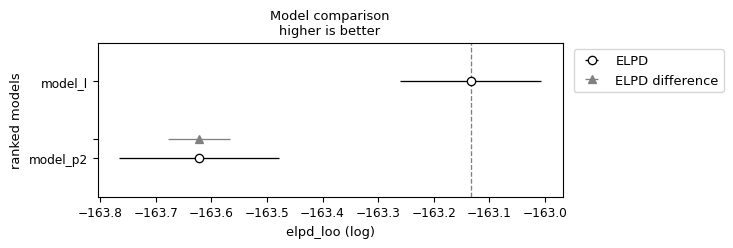

In [279]:
az.plot_compare(df_compare, insample_dev=False)